In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
autocycler = pd.read_csv('../../data/treemmer/autocycler_full_coverage_metrics.tsv', sep = '\t')
autocycler['strain'] = autocycler['name'].str.split('/', expand = True)[1]
autocycler['coverage'] = autocycler['input_read_bases']/autocycler['consensus_assembly_bases']

autocycler.loc[autocycler['coverage']>=125, 'coverage_cat'] = 'more_than_125x'
autocycler.loc[autocycler['coverage']<125, 'coverage_cat'] = 'less_than_125x'

autocycler[['strain', 'coverage']].to_csv('../../data/treemmer/autocycler_full_coverage_summarized.csv')
autocycler[['strain', 'coverage_cat']].to_csv('../../data/treemmer/treemmer_metadata_input.csv', index = None, header = False)

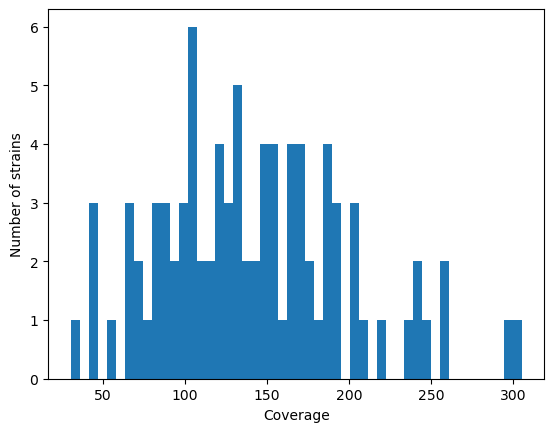

In [3]:
plt.hist(autocycler['coverage'], bins = 50)
plt.xlabel('Coverage')
plt.ylabel('Number of strains')
plt.show()

In [6]:
autocycler[autocycler['strain']=='EEE004']

,name,input_read_count,input_read_bases,input_read_n50,pass_cluster_count,fail_cluster_count,overall_clustering_score,untrimmed_cluster_size,untrimmed_cluster_distance,trimmed_cluster_size,trimmed_cluster_median,trimmed_cluster_mad,consensus_assembly_bases,consensus_assembly_unitigs,consensus_assembly_fully_resolved,strain,coverage,coverage_cat
23,autocycler/EEE004,44446,428235267,14134,3,2,0.909,"[24,24,7]","[0.000679,0.00719,0.00]","[21,12,7]","[2217365,39059,4207]","[16,0,0]",2260638,3,True,EEE004,189.431155,more_than_125x
